# $$ K Nearest Neighbors $$

### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">


In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.


In this sense, it is important to consider the value of k. But hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point.


In [41]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Data Analysis and Data visualize

In [9]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [5]:
df['income'].value_counts()      # count the values of income 

25.0     24
26.0     22
41.0     22
33.0     20
46.0     19
         ..
214.0     1
508.0     1
130.0     1
928.0     1
591.0     1
Name: income, Length: 218, dtype: int64

In [6]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

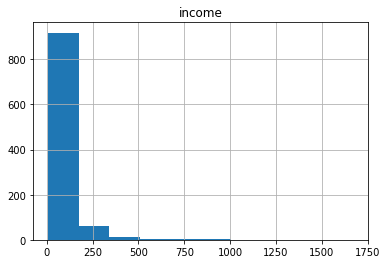

In [8]:
df.hist(column='income',bins=10)

In [10]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

convert pandas data frame into the numpy array

In [15]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
X[:10]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.],
       [  2.,  41.,  39.,   0.,  17.,  78.,   2.,  16.,   0.,   1.,   1.],
       [  3.,  45.,  22.,   1.,   2.,  19.,   2.,   4.,   0.,   1.,   5.],
       [  2.,  38.,  35.,   0.,   5.,  76.,   2.,  10.,   0.,   0.,   3.],
       [  3.,  45.,  59.,   1.,   7., 166.,   4.,  31.,   0.,   0.,   5.],
       [  1.,  68.,  41.,   1.,  21.,  72.,   1.,  22.,   0.,   0.,   3.]])

In [16]:
y = df['custcat'].values
y[:10]

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2], dtype=int64)

In [18]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [20]:
print("train data: ",X_train.shape,y_train.shape)
print("Test data: ",X_test.shape,y_test.shape)

train data:  (800, 11) (800,)
Test data:  (200, 11) (200,)


<h3>K nearest neighbor (KNN)</h3>


In [21]:
from sklearn.neighbors import KNeighborsClassifier

<h5>Training data , for k = 4</h5>

In [22]:
k = 4
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=4)

We can use model to predic the test set

In [24]:
yhat = knn.predict(X_test)
yhat[:9]

array([1, 1, 2, 1, 2, 1, 1, 2, 1], dtype=int64)

### Accuracy evaluation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


In [25]:
from sklearn import metrics
print("Training set Accuracy : ",metrics.accuracy_score(y_train,knn.predict(X_train)))
print("Testing set Accuracy : ",metrics.accuracy_score(y_test,yhat))

Training set Accuracy :  0.57125
Testing set Accuracy :  0.35


<h4>Find accuracy for k = 6</h4>

In [26]:
k = 6
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=6)

In [32]:
yhat6 = knn.predict(X_test)

In [33]:
print(metrics.accuracy_score(y_train,knn.predict(X_train)))
print(metrics.accuracy_score(y_test,yhat6))

0.52375
0.345


<AxesSubplot:ylabel='Count'>

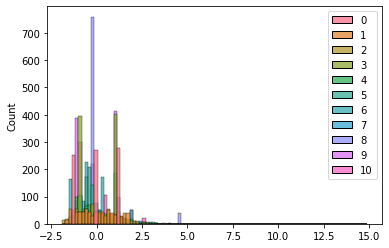

In [43]:
sns.histplot(X_train)

<AxesSubplot:ylabel='Count'>

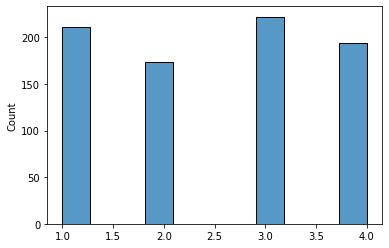

In [44]:
sns.histplot(y_train)